In [132]:
import torch as th
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

In [133]:
import matplotlib.pyplot as plt

In [216]:
tmp = th.tensor([[1,2,3],[4,5,6]], dtype=th.float32, requires_grad=False)
layer = nn.Linear(3,2, bias=False)

# layer.weight = nn.Parameter(th.tensor([[1,2,3],[4,5,6]], dtype=th.float32), requires_grad=True)

In [217]:
params2 = []
losses = []
optimizer = th.optim.Adam(layer.parameters(), lr=10e-2)
for i in range(1000):
    x = th.rand(3, requires_grad=False)

    with th.no_grad():
        y = th.matmul(tmp, x)

    f = layer(x)

    # loss = ((f-y)**2).mean().sqrt()
    loss = (F.mse_loss(f,y)+1e-6).sqrt()
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward(loss)
    optimizer.step()

    params2.append(layer.weight.data.detach().numpy().reshape(-1).copy())

params2 = np.c_[params2]

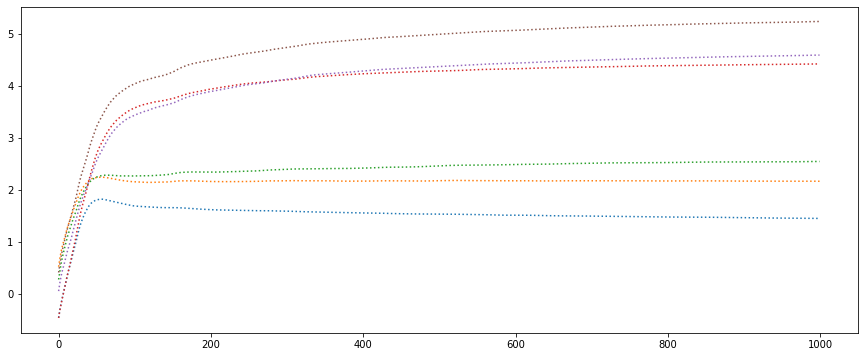

In [218]:
plt.figure(figsize=(15, 6))
# plt.plot(params)
plt.plot(params2, ':', ms=6)
plt.show()

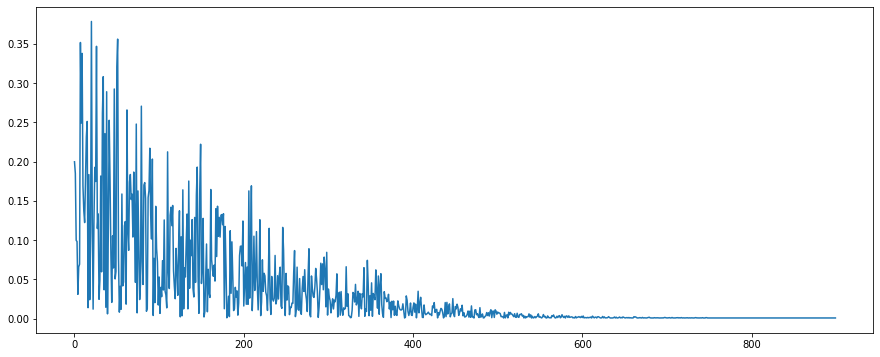

In [214]:
plt.figure(figsize=(15, 6))
plt.plot(losses[100:])
plt.show()

In [215]:
layer.weight

Parameter containing:
tensor([[1.0000, 2.0000, 3.0000],
        [4.0001, 5.0000, 5.9999]], requires_grad=True)